<a href="https://colab.research.google.com/github/Severus25/Handwritten-Digit-Recognition/blob/main/MNIST_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found on Yann LeCun's page and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](https://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

# **Installation**


In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

**Important: Restart the Kernel before you move on to the next step.**

In [2]:
!pip install opencv-python-headless matplotlib numpy pillow bokeh torch torchvision tqdm ipywidgets livelossplot pytest pandas seaborn jupyter ipykernel --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

# **Imports**


In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using {device}")

Using cpu


# **Load the Dataset**
Specify your transforms as a list if you intend to . The transforms module is already loaded as transforms.

MNIST is fortunately included in the torchvision module. Then, you can create your dataset using the MNIST object from torchvision.datasets ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)). Make sure to specify download=True!

Once your dataset is created, you'll also need to define a DataLoader from the torch.utils.data module for both the train and the test set.

In [5]:
# Define transforms
transform = transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize(0,1,inplace=True),


])
# Create training set and define training dataloader
train_data = datasets.MNIST(root="data", train= True, transform = transform,download= True)
train_loader = DataLoader(train_data, batch_size= 64, shuffle= True)
# Create test set and define test dataloader
test_data = datasets.MNIST(root="data", train= False, transform = transform,download= True)
test_loader = DataLoader(test_data, batch_size= 64, shuffle= True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 120MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 24.0MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 77.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.89MB/s]


In [6]:
for data in train_loader:
    print(data[0].shape, data[1].shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


# **Justify your preprocessing**
In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

DOUBLE CLICK THIS CELL TO MODIFY

# **Explore the Dataset**
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the show5 function defined below – it takes a data loader as an argument. Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images. Typically using no transforms other than toTensor() works well for viewing – but not as well for training your network. If show5 doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


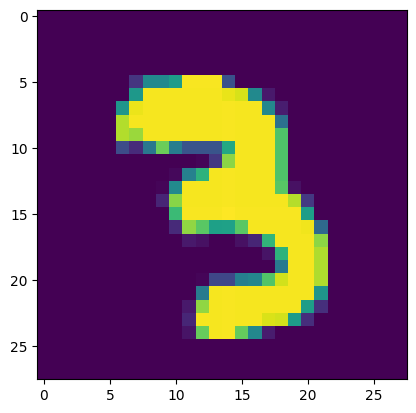

9


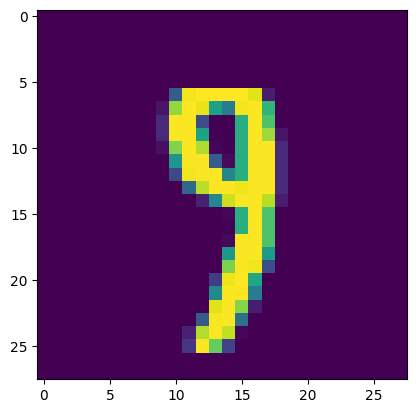

3


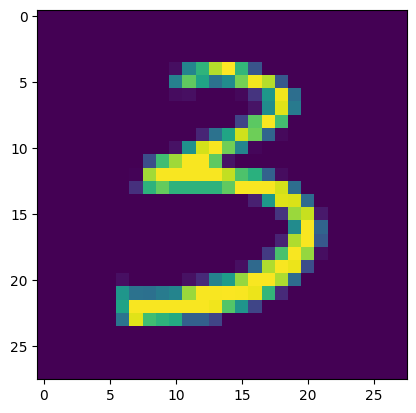

1


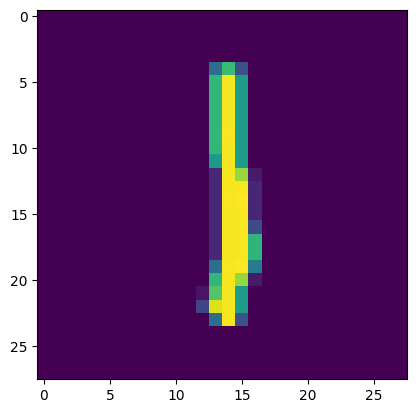

0


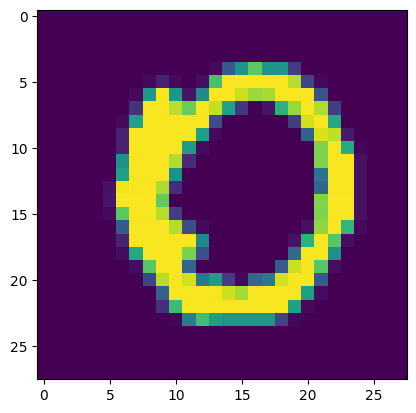

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

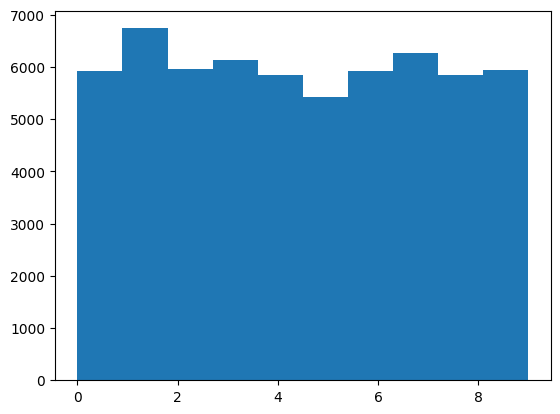

In [8]:
# Explore data
show5(train_loader)

# show labels's distribution
labels = []
for data in train_loader:
    labels += data[1].tolist()
plt.hist(labels, bins = 10)

# **Build your Neural Network**
Using the layers in torch.nn (which has been imported as nn) and the torch.nn.functional module (imported as F), construct a neural network based on the parameters of the dataset. Use any architecture you like.

Note: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only Linear layers, make sure to use the Flatten layer in your network!

In [9]:
writer = SummaryWriter("runs/mnist")

In [10]:
class Model (nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))

        x = self.fc4(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 0.0001,)
lossses = []
accuracies = []
def train(model, dataloader,val_dataloader, epochs = 5):

    for epoch in range(epochs):
        model.train()
        for data in dataloader:
            X, y = data
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            lossses.append(loss)
            writer.add_scalar("Loss/train", loss, epoch)
            loss.backward()
            optimizer.step()
        model.eval()
        train_correct = 0
        for data in val_dataloader:
            X, y = data
            X, y = X.to(device), y.to(device)
            output = model(X)
            train_correct += (torch.argmax(output, dim = 1) == y).float().sum()
        accuracy = train_correct/len(val_dataloader.dataset)
        accuracies.append(accuracy)
        print(f"Epoch: {epoch}. Loss: {loss}, Accuracy: {accuracy}")
        writer.add_scalar("Accuracy/train",accuracy, epoch)
        writer.flush()

# **Running your Neural Network**
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. Don't forget to use torch.device() and the .to() method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the enumerate function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
train(model, train_loader, test_loader, epochs = 20)

Epoch: 0. Loss: 0.2070046365261078, Accuracy: 0.9607999920845032
Epoch: 1. Loss: 0.036810193210840225, Accuracy: 0.9696000218391418
Epoch: 2. Loss: 0.04082491621375084, Accuracy: 0.9689000248908997
Epoch: 3. Loss: 0.06057259067893028, Accuracy: 0.9746999740600586
Epoch: 4. Loss: 0.0027309947181493044, Accuracy: 0.974399983882904
Epoch: 5. Loss: 0.055408548563718796, Accuracy: 0.9757000207901001
Epoch: 6. Loss: 0.009836257435381413, Accuracy: 0.9761999845504761
Epoch: 7. Loss: 0.020711466670036316, Accuracy: 0.9750999808311462
Epoch: 8. Loss: 0.008440745994448662, Accuracy: 0.9750999808311462
Epoch: 9. Loss: 0.04068955034017563, Accuracy: 0.9749000072479248
Epoch: 10. Loss: 0.08102136850357056, Accuracy: 0.9811999797821045
Epoch: 11. Loss: 0.10187390446662903, Accuracy: 0.9779000282287598
Epoch: 12. Loss: 0.0018968674121424556, Accuracy: 0.9765999913215637
Epoch: 13. Loss: 0.0006946994108147919, Accuracy: 0.9801999926567078
Epoch: 14. Loss: 0.06333909928798676, Accuracy: 0.9757999777793

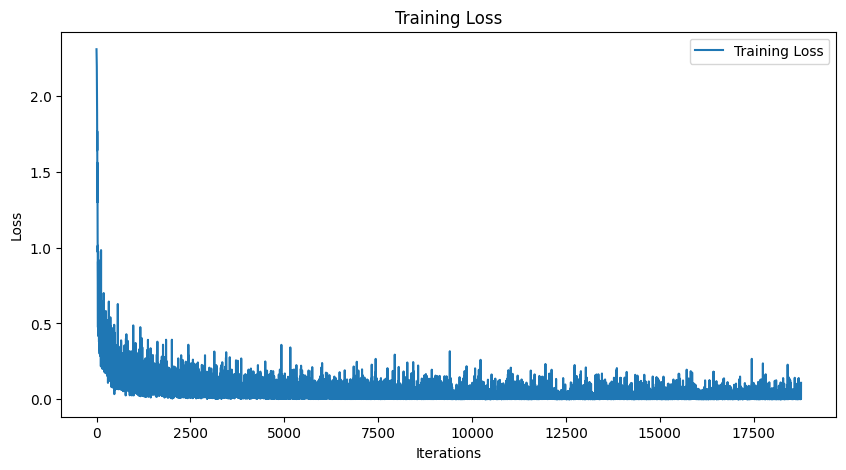

In [13]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot([loss.item() for loss in lossses], label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

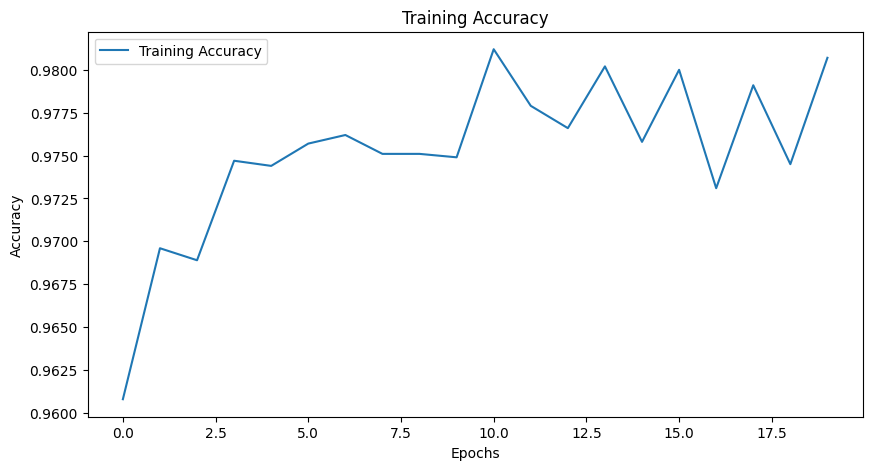

In [14]:
# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot([accuracy.item() for accuracy in accuracies], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

In [15]:
model.eval()
test_correct = 0
with torch.no_grad():
    for data in test_loader:
        X, y = data
        X, y = X.to(device), y.to(device)
        output = model(X)
        test_correct += (torch.argmax(output, dim=1) == y).float().sum()

test_accuracy = test_correct / len(test_loader.dataset)
print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")

Test Accuracy: 98.07%


In [16]:
torch.save(model.state_dict(), 'mnist_model.pth')